In [1]:
import pandas as pd
import folium

In [2]:
df = pd.read_csv("datasets V2AIX/df_v3.csv")

In [3]:
df_trajet = pd.read_excel("datasets V2AIX/df_trips.xlsx")

In [4]:
df = df.dropna()

In [5]:
df

,Unnamed: 0,recording_timestamp_nsec,message_header_protocol_version,message_header_message_id,message_header_station_id_value,message_cam_generation_delta_time_value,message_cam_cam_parameters_basic_container_station_type_value,message_cam_cam_parameters_basic_container_reference_position_latitude_value,message_cam_cam_parameters_basic_container_reference_position_longitude_value,message_cam_cam_parameters_basic_container_reference_position_position_confidence_ellipse_semi_major_confidence_value,...,trip_local_id,trip_id,latitude,longitude,speed,acceleration,yaw_rate,curvature,length,width
0,4796,1705242280082009183,2,2,1020139,0,15,476027011,121878478,1,...,1,1020139_1,47.602701,12.187848,0.00,0.00,0.00,0,0,0
1,4797,1705242285081622419,2,2,1020139,0,15,476027011,121878478,1,...,1,1020139_1,47.602701,12.187848,0.00,0.00,0.00,0,0,0
2,4798,1705242286756171194,2,2,1020139,0,15,476027011,121878478,1,...,1,1020139_1,47.602701,12.187848,0.00,0.00,0.00,0,0,0
3,4799,1705242289249213947,2,2,1020139,0,15,476027011,121878478,1,...,1,1020139_1,47.602701,12.187848,0.00,0.00,0.00,0,0,0
4,4800,1705242290085110253,2,2,1020139,0,15,476027011,121878478,1,...,1,1020139_1,47.602701,12.187848,0.00,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261081,119658,1707308534777487625,2,2,4292598651,23892,5,507710106,60912207,483,...,1,4292598651_1,50.771011,6.091221,3.26,0.14,0.13,-45,42,18
261082,119659,1707308535282156567,2,2,4292598651,24376,5,507710028,60912416,492,...,1,4292598651_1,50.771003,6.091242,3.82,0.13,0.11,-30,42,18
261083,119660,1707308535776845520,2,2,4292598651,24895,5,507709941,60912685,496,...,1,4292598651_1,50.770994,6.091268,4.33,0.11,0.10,-17,42,18
261084,119661,1707308536281590392,2,2,4292598651,25376,5,507709848,60912944,502,...,1,4292598651_1,50.770985,6.091294,4.61,0.03,0.05,-10,42,18


In [6]:
# # Convertir les coordonnées
# df["latitude"] = df["message_cam_cam_parameters_basic_container_reference_position_latitude_value"] / 1e7
# df["longitude"] = df["message_cam_cam_parameters_basic_container_reference_position_longitude_value"] / 1e7

# # Filtrer les lignes valides
# df = df[(df["latitude"] != 0) & (df["longitude"] != 0)]

# # Trier les points par station_id + timestamp
# df = df.sort_values(by=["message_header_station_id_value", "recording_timestamp_nsec"])

# # Créer une carte
# m = folium.Map(location=[50.117411328910066, 8.670635440549084], zoom_start=7)

# # Tracer toutes les trajectoires, même couleur
# for _, group in df.groupby("message_header_station_id_value"):
#     points = list(zip(group["latitude"], group["longitude"]))
#     if len(points) > 1:
#         folium.PolyLine(points, color="blue", weight=4, opacity=0.8).add_to(m)

# m

In [7]:
df = df.drop(columns="Unnamed: 0")


In [8]:
df_trajet = df_trajet.drop(columns="Unnamed: 0")

In [9]:
# Supprimer la limite d'affichage des colonnes
pd.set_option('display.max_columns', None)

df.head()

,recording_timestamp_nsec,message_header_protocol_version,message_header_message_id,message_header_station_id_value,message_cam_generation_delta_time_value,message_cam_cam_parameters_basic_container_station_type_value,message_cam_cam_parameters_basic_container_reference_position_latitude_value,message_cam_cam_parameters_basic_container_reference_position_longitude_value,message_cam_cam_parameters_basic_container_reference_position_position_confidence_ellipse_semi_major_confidence_value,message_cam_cam_parameters_basic_container_reference_position_position_confidence_ellipse_semi_minor_confidence_value,message_cam_cam_parameters_basic_container_reference_position_position_confidence_ellipse_semi_major_orientation_value,message_cam_cam_parameters_basic_container_reference_position_altitude_altitude_value_value,message_cam_cam_parameters_basic_container_reference_position_altitude_altitude_confidence_value,message_cam_cam_parameters_high_frequency_container_choice,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_heading_heading_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_heading_heading_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_speed_speed_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_speed_speed_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_drive_direction_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_vehicle_length_vehicle_length_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_vehicle_length_vehicle_length_confidence_indication_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_vehicle_width_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_longitudinal_acceleration_longitudinal_acceleration_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_longitudinal_acceleration_longitudinal_acceleration_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_curvature_curvature_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_curvature_curvature_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_curvature_calculation_mode_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_yaw_rate_yaw_rate_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_yaw_rate_yaw_rate_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_acceleration_control_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_acceleration_control_bits_unused,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_acceleration_control_is_present,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_lane_position_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_lane_position_is_present,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_steering_wheel_angle_steering_wheel_angle_value_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_steering_wheel_angle_steering_wheel_angle_confidence_value,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_steering_wheel_angle_is_present,message_cam_cam_parameters_high_frequency_container_basic_vehicle_container_high_frequency_la

In [10]:
df_trajet.describe()

,station_id,trip_local_id,speed_mean,speed_std,acc_mean,acc_std,yaw_rate_mean,curvature_mean,length,width,latitude_start,latitude_end,longitude_start,longitude_end,start_time,end_time,trip_duration_seconds,model_id,size,trip_duration_minutes
count,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768,768,768.000000,768.000000,768.000000,768.000000
mean,2.175001e+09,1.035156,14.887636,3.602804,0.006696,0.069343,2.565435,268.770470,43.473958,18.037760,50.813185,50.813480,6.346961,6.346388,2024-01-30 04:09:07.617674496,2024-01-30 04:11:19.383819008,131.766149,1.688802,784.384115,2.196102
min,5.933924e+06,1.000000,0.167347,0.000000,-0.081951,0.000000,0.043571,-399.913907,42.000000,18.000000,47.567777,47.564340,6.060517,6.054683,2024-01-06 15:57:24.505000,2024-01-06 16:06:21.685000,60.003411,1.000000,756.000000,1.000057
25%,1.054895e+09,1.000000,3.710495,2.416016,-0.007228,0.040419,0.714793,-0.214632,42.000000,18.000000,50.771542,50.771586,6.079590,6.079657,2024-01-25 17:36:48.312249856,2024-01-25 17:38:13.861749760,77.541170,1.000000,756.000000,1.292353
50%,2.185640e+09,1.000000,5.819039,3.361701,0.001770,0.069908,1.349019,126.350210,42.000000,18.000000,50.782055,50.781909,6.093410,6.092954,2024-01-30 16:24:52.253499904,2024-01-30 16:27:21.678500096,97.243922,1.000000,756.000000,1.620732
75%,3.279222e+09,1.000000,29.475667,4.019828,0.015289,0.092164,2.831799,545.304687,45.000000,18.000000,51.031216,51.032270,6.478909,6.480376,2024-02-01 08:57:24.487500032,2024-02-01 08:59:32.025999872,154.518666,2.000000,810.000000,2.575311
max,4.292599e+09,3.000000,163.830000,64.905458,1.610000,0.238405,327.670000,1023.000000,51.000000,19.000000,51.216029,51.218157,12.149745,12.138413,2024-07-29 19:36:26.432000,2024-07-29 19:37:55.489000,1438.303529,7.000000,969.000000,23.971725
std,1.255735e+09,0.197938,15.193672,4.000740,0.062272,0.035334,11.974008,306.683280,2.019939,0.190741,0.389328,0.386974,0.702165,0.700214,NaN,NaN,98.804682,1.133020,42.258281,1.646745


In [11]:
lat_min = min(df_trajet["latitude_start"].min(), df_trajet["latitude_end"].min())
lat_max = max(df_trajet["latitude_start"].max(), df_trajet["latitude_end"].max())
lon_min = min(df_trajet["longitude_start"].min(), df_trajet["longitude_end"].min())
lon_max = max(df_trajet["longitude_start"].max(), df_trajet["longitude_end"].max())

In [12]:
import numpy as np

lat_mean = (lat_min + lat_max) / 2
height_km = (lat_max - lat_min) * 111
width_km = (lon_max - lon_min) * 111 * np.cos(np.radians(lat_mean))
area_km2 = height_km * width_km


In [13]:
n_trips = len(df_trajet)
density = n_trips / area_km2
print(f"Surface estimée : {area_km2:.2f} km²")
print(f"Densité de trajets : {density:.4f} trajets/km²")


Surface estimée : 178598.81 km²
Densité de trajets : 0.0043 trajets/km²


In [14]:
import numpy as np

# Coordonnées de Aachen
aachen_lat = 50.7753
aachen_lon = 6.0839

# Rayon autour de la ville (en km)
radius_km = 5

# Conversion du rayon en degrés
lat_range = radius_km / 111  # latitude: ~111 km par degré
lon_range = radius_km / (111 * np.cos(np.radians(aachen_lat)))  # longitude corrigée par latitude

# Filtrer les trajets dont les points de départ OU d'arrivée sont proches de Aachen
in_aachen_area = (
    ((df_trajet["latitude_start"].between(aachen_lat - lat_range, aachen_lat + lat_range)) &
     (df_trajet["longitude_start"].between(aachen_lon - lon_range, aachen_lon + lon_range))) |
    ((df_trajet["latitude_end"].between(aachen_lat - lat_range, aachen_lat + lat_range)) &
     (df_trajet["longitude_end"].between(aachen_lon - lon_range, aachen_lon + lon_range)))
)

# Extraire les trajets concernés
df_aachen = df_trajet[in_aachen_area]

# Surface locale approximative (cercle de rayon R)
area_aachen_km2 = np.pi * radius_km**2

# Densité locale
n_aachen_trips = len(df_aachen)
density_aachen = n_aachen_trips / area_aachen_km2

print(f"Surface couverte : {area_aachen_km2:.2f} km²")
print(f"{n_aachen_trips} trajets trouvés dans un rayon de {radius_km} km autour d’Aachen.")
print(f"Densité locale : {density_aachen:.2f} trajets/km²")


Surface couverte : 78.54 km²
472 trajets trouvés dans un rayon de 5 km autour d’Aachen.
Densité locale : 6.01 trajets/km²


In [15]:
df_aachen.describe()

,station_id,trip_local_id,speed_mean,speed_std,acc_mean,acc_std,yaw_rate_mean,curvature_mean,length,width,latitude_start,latitude_end,longitude_start,longitude_end,start_time,end_time,trip_duration_seconds,model_id,size,trip_duration_minutes
count,4.720000e+02,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472,472,472.000000,472.000000,472.000000,472.000000
mean,2.163471e+09,1.042373,4.755107,3.403563,0.009803,0.086920,3.300759,240.107959,43.271186,18.038136,50.775841,50.775992,6.085935,6.085881,2024-01-29 04:47:56.850052864,2024-01-29 04:49:43.161915392,106.311877,1.614407,780.754237,1.771865
min,5.933924e+06,1.000000,0.167347,0.000000,-0.081951,0.000000,0.043571,-399.913907,42.000000,18.000000,50.720171,50.750868,6.060517,6.054683,2024-01-06 15:57:24.505000,2024-01-06 16:06:21.685000,60.003411,1.000000,756.000000,1.000057
25%,1.046346e+09,1.000000,3.172156,2.832475,-0.010638,0.068743,0.866486,0.565565,42.000000,18.000000,50.770341,50.770436,6.077337,6.078650,2024-01-22 14:12:38.654499840,2024-01-22 14:13:55.169750016,71.671279,1.000000,756.000000,1.194521
50%,2.138990e+09,1.000000,4.171992,3.465818,0.004886,0.084090,2.083910,106.664530,42.000000,18.000000,50.772204,50.772233,6.088849,6.088258,2024-01-29 18:17:58.188999936,2024-01-29 18:20:18.574499840,87.545773,1.000000,756.000000,1.459096
75%,3.274271e+09,1.000000,5.441071,3.998122,0.022341,0.101546,3.319398,510.669565,45.000000,18.000000,50.781988,50.781907,6.092963,6.092524,2024-02-03 15:15:20.839250176,2024-02-03 15:16:32.317250048,101.145766,2.000000,810.000000,1.685763
max,4.292599e+09,3.000000,163.830000,20.036535,1.610000,0.238405,327.670000,1023.000000,51.000000,19.000000,50.794067,50.794823,6.150144,6.161146,2024-07-29 19:36:26.432000,2024-07-29 19:37:55.489000,1438.303529,7.000000,969.000000,23.971725
std,1.264202e+09,0.211919,7.602114,1.222788,0.078383,0.028660,15.181691,283.326224,2.003865,0.191727,0.006370,0.005925,0.009011,0.008664,NaN,NaN,89.625648,1.137866,42.273739,1.493761


In [16]:
# Conversion du timestamp d'origine
df['timestamp'] = pd.to_datetime(df['recording_timestamp_nsec'], unit='ns')

# Recaler tous les timestamps sur le 1er janvier 2025
df['timestamp'] = df['timestamp'].apply(
    lambda ts: pd.Timestamp("2025-01-01") + pd.Timedelta(hours=ts.hour, minutes=ts.minute, seconds=ts.second, microseconds=ts.microsecond)
)


In [17]:
# df.to_csv("df_v4.csv")

Here.

In [18]:
from geopy.distance import geodesic

# Assurer le tri par trajet et timestamp
df = df.sort_values(by=['trip_id', 'timestamp']).copy()

# Initialiser la colonne 'distance'
df['distance'] = 0.0

# Calculer la distance cumulée par trajet
for trip_id, group in df.groupby('trip_id'):
    distances = [0.0]
    coords = list(zip(group['latitude'], group['longitude']))
    for i in range(1, len(coords)):
        dist = geodesic(coords[i - 1], coords[i]).meters
        distances.append(distances[-1] + dist)
    df.loc[group.index, 'distance'] = distances

In [19]:
def simulate_etsi_pattern_with_logging(group, counters):
    group = group.sort_values(by='timestamp').copy()
    group['pseudonym_id_simulated'] = None
    group['silent_period'] = False

    trip_id = group['trip_id'].iloc[0]
    pseudonym_index = 0
    current_pid = f"{trip_id}_{pseudonym_index}"
    group.loc[group.index[0], 'pseudonym_id_simulated'] = current_pid

    # Préparer le premier vrai changement : distance ∈ [800, 1500]
    next_dist_threshold = np.random.uniform(800, 1500)
    min_time_threshold = np.random.uniform(120, 360)

    last_change_time = group['timestamp'].iloc[0]
    last_change_dist = group['distance'].iloc[0]

    for i in range(1, len(group)):
        dist_elapsed = group['distance'].iloc[i] - last_change_dist
        time_elapsed = (group['timestamp'].iloc[i] - last_change_time).total_seconds()

        should_change = False
        etsi_compliant = False

        # Premier changement
        if pseudonym_index == 0 and dist_elapsed >= next_dist_threshold:
            should_change = True
            etsi_compliant = 800 <= dist_elapsed <= 1500  # strict pour la 2e règle ETSI

        # Changement suivant : distance ET temps
        elif pseudonym_index >= 1 and dist_elapsed >= 800 and time_elapsed >= min_time_threshold:
            should_change = True
            etsi_compliant = True  # par construction

        if should_change:
            pseudonym_index += 1
            current_pid = f"{trip_id}_{pseudonym_index}"

            # Silent period
            silent_duration = np.random.uniform(5, 13)
            silent_start = group['timestamp'].iloc[i] - pd.to_timedelta(silent_duration, unit='s')
            silent_mask = (group['timestamp'] >= silent_start) & (group['timestamp'] < group['timestamp'].iloc[i])
            group.loc[silent_mask, 'silent_period'] = True

            # Logs
            print(f"[{group['timestamp'].iloc[i]}] Trip {trip_id} → New pseudonym: {current_pid} "
                  f"(Δt = {time_elapsed:.1f} s, Δd = {dist_elapsed:.1f} m) "
                  f"{'✔️ ETSI' if etsi_compliant else '❌ non-ETSI'}")

            # Compteurs
            counters['total'] += 1
            if etsi_compliant:
                counters['etsi_compliant'] += 1

            # Mise à jour état interne
            last_change_time = group['timestamp'].iloc[i]
            last_change_dist = group['distance'].iloc[i]
            min_time_threshold = np.random.uniform(120, 360)

        group.loc[group.index[i], 'pseudonym_id_simulated'] = current_pid

    return group


In [20]:
# Initialiser les compteurs
counters = {'total': 0, 'etsi_compliant': 0}

# Appliquer avec log
df = df.groupby('trip_id').apply(lambda g: simulate_etsi_pattern_with_logging(g, counters)).reset_index(drop=True)

# Résumé
print(f"\nTotal pseudonym changes: {counters['total']}")
print(f"ETSI-compliant changes:  {counters['etsi_compliant']}")
print(f"Compliance rate:         {100 * counters['etsi_compliant'] / counters['total']:.2f}%")


[2025-01-01 11:18:30.704605] Trip 1002454095_1 → New pseudonym: 1002454095_1_1 (Δt = 47.2 s, Δd = 1502.3 m) ❌ non-ETSI
[2025-01-01 15:06:12.712574] Trip 1015021849_1 → New pseudonym: 1015021849_1_1 (Δt = 23.8 s, Δd = 1047.9 m) ✔️ ETSI
[2025-01-01 17:36:22.021089] Trip 1017366401_1 → New pseudonym: 1017366401_1_1 (Δt = 29.3 s, Δd = 1010.8 m) ✔️ ETSI
[2025-01-01 15:16:55.357997] Trip 1021954853_1 → New pseudonym: 1021954853_1_1 (Δt = 26.7 s, Δd = 1121.9 m) ✔️ ETSI
[2025-01-01 08:29:18.965538] Trip 1022858984_1 → New pseudonym: 1022858984_1_1 (Δt = 39.9 s, Δd = 1133.6 m) ✔️ ETSI
[2025-01-01 17:02:17.291015] Trip 1053135262_1 → New pseudonym: 1053135262_1_1 (Δt = 67.3 s, Δd = 888.2 m) ✔️ ETSI
[2025-01-01 15:00:29.284521] Trip 1055481833_1 → New pseudonym: 1055481833_1_1 (Δt = 31.8 s, Δd = 1168.1 m) ✔️ ETSI
[2025-01-01 15:10:32.869253] Trip 1078448323_1 → New pseudonym: 1078448323_1_1 (Δt = 32.1 s, Δd = 1266.4 m) ✔️ ETSI
[2025-01-01 15:44:25.751700] Trip 1080300514_1 → New pseudonym: 108030

C:\Users\vi.carpentier\AppData\Local\Temp\ipykernel_13012\205333916.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('trip_id').apply(lambda g: simulate_etsi_pattern_with_logging(g, counters)).reset_index(drop=True)



Total pseudonym changes: 344
ETSI-compliant changes:  309
Compliance rate:         89.83%


Despite following the ETSI TR 103 415 (V2.1.1) guidelines for pseudonym changes, 9.3% of the transitions in our simulation are marked as non-compliant.

This discrepancy is primarily due to the discrete nature of CAM messages in the dataset: pseudonym changes are triggered based on real data points, which do not always align perfectly with the ideal distance or timing thresholds.

For example, the second pseudonym is expected to be assigned once the distance travelled reaches a randomly selected value between 800 and 1500 meters. 

However, if the dataset jumps from, say, 700 meters to 1600 meters without intermediate points, the pseudonym change is delayed and logged as exceeding the upper ETSI limit. 

Similarly, in subsequent changes, both a minimum distance of 800 meters and a random time delay of 2 to 6 minutes are required. 

When only one of the two conditions is satisfied at a given data point, the change is postponed until both are met, which can sometimes occur outside the desired interval. 

These minor timing and positioning mismatches account for the observed 9.3% deviation from full ETSI compliance.

In [21]:
# # Sélectionner les colonnes essentielles
# cols_to_export = [
#     'timestamp',
#     'trip_id',
#     'pseudonym_id_simulated',
#     'distance',
#     'silent_period',
#     'latitude',
#     'longitude',
#     'speed',
#     'acceleration',
#     'yaw_rate',
#     'curvature',
#     'length',
#     'width'
# ]

# # Export en CSV
# df[cols_to_export].to_csv("v2aix_etsi_compliant.csv", index=False)

# # Optionnel : export Excel
# # df[cols_to_export].to_excel("v2aix_etsi_compliant.xlsx", index=False)

In [22]:
print(df_trajet['trip_id'].dtype)

object


In [23]:
df['date'] = df['timestamp'].dt.date

# Agrégation par pseudonyme simulé
df_trajet_simule = df.groupby('pseudonym_id_simulated').agg({
    'timestamp': ['min', 'max'],
    'latitude': ['first', 'last'],
    'longitude': ['first', 'last'],
    'distance': 'max',
    'speed': 'mean',  # proxy si pas d'autre info de type véhicule
}).reset_index()

# Aplatir les colonnes multi-index
df_trajet_simule.columns = [
    'pseudonym_id', 'start_time', 'end_time',
    'start_latitude', 'end_latitude',
    'start_longitude', 'end_longitude',
    'distance_m', 'mean_speed'
]

# Ajout de variables dérivées
df_trajet_simule["trip_duration_seconds"] = (df_trajet_simule["end_time"] - df_trajet_simule["start_time"]).dt.total_seconds()
df_trajet_simule["trip_duration_minutes"] = df_trajet_simule["trip_duration_seconds"] / 60
df_trajet_simule["distance_km"] = df_trajet_simule["distance_m"] / 1000

# Extraire le trip_id depuis pseudonym_id (format "123456_0")
df_trajet_simule['trip_id'] = df_trajet_simule['pseudonym_id'].str.extract(r'^(\d+)_')[0].astype(int)
df_trajet_simule['trip_id'] = df_trajet_simule['trip_id'].astype(int)
df_trajet['trip_id'] = df_trajet['trip_id'].astype(int)

# Extraire station_id associé à chaque pseudonym_id_simulated
station_map = df.groupby("pseudonym_id_simulated")["message_header_station_id_value"].agg(lambda x: x.mode().iloc[0]).reset_index()

# Renommer pour correspondre
station_map.columns = ["pseudonym_id", "station_id"]

# Fusionner avec df_trajet_simule
df_trajet_simule = df_trajet_simule.merge(station_map, on="pseudonym_id", how="left")

# Extraire la correspondance station_id → model_id depuis df_trajet
station_to_model = df_trajet[['station_id', 'model_id']].drop_duplicates()

# Fusionner avec df_trajet_simule sur station_id
df_trajet_simule = df_trajet_simule.merge(station_to_model, on='station_id', how='left')



In [24]:
df_trajet_simule["model_id"].value_counts(dropna=False)

model_id
NaN    1534
1.0     659
2.0     242
3.0     172
6.0      26
7.0       9
4.0       8
5.0       3
Name: count, dtype: int64

In [25]:
station_simule = set(df_trajet_simule["station_id"].unique())
station_ref = set(df_trajet["station_id"].unique())

missing_stations = station_simule - station_ref
print(f"{len(missing_stations)} station_id dans df_trajet_simule ne sont pas dans df_trajet")

1481 station_id dans df_trajet_simule ne sont pas dans df_trajet


In [26]:
# Nombre de station_id distincts par pseudonym_id
station_per_pseudonym = df_trajet_simule.groupby("station_id")["pseudonym_id"].nunique()

# Compter ceux qui sont associés à un seul véhicule
unique_station_count = (station_per_pseudonym == 1).sum()

# Proportion de pseudonymes associés à un seul véhicule
pourcentage_identifiants_vehicule = 100 * unique_station_count / len(station_per_pseudonym)
print("Proportion de pseudonym_id associés à un seul véhicule :", np.round(pourcentage_identifiants_vehicule, 2), "%")

Proportion de pseudonym_id associés à un seul véhicule : 83.64 %


In [27]:
# Agréger par station_id
agg_by_station = df_trajet_simule.groupby("station_id").agg({
    "distance_m": "sum",
    "pseudonym_id": "nunique"
})

# Garder seulement les véhicules ayant parcouru au total ≥ 800m
agg_by_station = agg_by_station[agg_by_station["distance_m"] >= 800]

# Calculer proportion de ceux qui ont eu un seul pseudonyme
proportion = 100 * (agg_by_station["pseudonym_id"] == 1).sum() / len(agg_by_station)
print("Proportion de véhicules avec un seul pseudonym_id (≥800m cumulés) :", np.round(proportion, 2), "%")

Proportion de véhicules avec un seul pseudonym_id (≥800m cumulés) : 6.69 %


In [28]:
# Garder seulement les véhicules ayant parcouru au total ≥ 1500m
agg_by_station = agg_by_station[agg_by_station["distance_m"] >= 1500]

# Calculer proportion de ceux qui ont eu un seul pseudonyme
proportion = 100 * (agg_by_station["pseudonym_id"] == 1).sum() / len(agg_by_station)
print("Proportion de véhicules avec un seul pseudonym_id (≥1500m cumulés) :", np.round(proportion, 2), "%")

Proportion de véhicules avec un seul pseudonym_id (≥1500m cumulés) : 0.0 %


In [29]:
df_trajet_simule = df_trajet_simule.sort_values("start_time").reset_index(drop=True)
df_trajet_simule["segment_index"] = df_trajet_simule.index

In [30]:
import numpy as np

def compute_bearing(lat1, lon1, lat2, lon2):
    # Calcul de la direction entre deux points (en degrés)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1

    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dlon))
    bearing = np.degrees(np.arctan2(x, y))
    return (bearing + 360) % 360

# Appliquer sur le DataFrame
df_trajet_simule["direction"] = compute_bearing(
    df_trajet_simule["start_latitude"],
    df_trajet_simule["start_longitude"],
    df_trajet_simule["end_latitude"],
    df_trajet_simule["end_longitude"]
)

# Pour compatibilité avec l'algo
df_trajet_simule["start_direction"] = df_trajet_simule["direction"]
df_trajet_simule["end_direction"] = df_trajet_simule["direction"]


Relinking Naïf

In [31]:
from geopy.distance import geodesic

def relinking_score(row_A, row_B):
    # Distance en mètres entre la fin de A et le début de B
    spatial_dist = geodesic(
        (row_A["end_latitude"], row_A["end_longitude"]),
        (row_B["start_latitude"], row_B["start_longitude"])
    ).meters

    # Temps écoulé en secondes entre A et B
    temporal_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()

    # Score combiné (plus bas = plus probable)
    # pondération arbitraire : 1 mètre ≈ 1 seconde ici
    if temporal_gap < 0 or temporal_gap > 600:  # exclusion >10 min ou B commence avant A se termine
        return np.inf

    return spatial_dist + temporal_gap  # ou une pondération personnalisée


In [32]:
best_links = []

for i, row_A in df_trajet_simule.iterrows():
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]
    
    best_score = np.inf
    best_match_id = None
    
    for _, row_B in candidates.iterrows():
        score = relinking_score(row_A, row_B)
        if score < best_score:
            best_score = score
            best_match_id = row_B["pseudonym_id"]
    
    if best_match_id is not None:
        best_links.append({
            "source": row_A["pseudonym_id"],
            "target": best_match_id,
            "score": best_score
        })

In [33]:
df_links = pd.DataFrame(best_links)

In [34]:
from collections import defaultdict

# Créer un graphe orienté : source → target
link_dict = dict(zip(df_links["source"], df_links["target"]))

# Stocker les chaînes reconstruites
chains = []
visited = set()

for source in link_dict:
    if source in visited:
        continue

    chain = [source]
    visited.add(source)
    current = source

    while current in link_dict:
        next_pseudo = link_dict[current]
        if next_pseudo in visited or next_pseudo == current:
            break
        chain.append(next_pseudo)
        visited.add(next_pseudo)
        current = next_pseudo

    chains.append(chain)


In [35]:
reconstructed_trip_map = {}
for i, chain in enumerate(chains):
    for pseudo_id in chain:
        reconstructed_trip_map[pseudo_id] = f"retrip_{i}"


In [36]:
df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_trip_map)

In [39]:
# Pour chaque trip_id, combien de retrip_id différents ?
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()

# Pourcentage de trip_id qui ont été entièrement reconstitués
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"nombre de trajets reconstitués : {nb_reconstitués}")

Réidentification complète de trajets : 93.21%
nombre de trajets reconstitués : 2085


In [40]:
# Pour chaque retrip_id, combien de trip_id différents y sont associés ?
retrip_purity = df_eval.groupby("retrip_id")["trip_id"].nunique()

# On compte combien de chaînes contiennent un seul trip_id (donc correctes)
nb_retrip_corrects = (retrip_purity == 1).sum()
nb_retrip_total = len(retrip_purity)

retrip_precision = 100 * nb_retrip_corrects / nb_retrip_total

print(f"Retrip Precision : {retrip_precision:.2f}%")

Retrip Precision : 64.04%


In [41]:
# Vérifie pour chaque trip si tous ses pseudos sont dans la même chaîne
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trip_unique_retrip = trip_to_retrip[trip_to_retrip == 1].index  # candidats

# Ensuite, on s'assure que la chaîne ne contient QUE ces segments
perfect_reconstruction = 0

for trip_id in trip_unique_retrip:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    involved_trip_ids = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(involved_trip_ids) == 1:
        perfect_reconstruction += 1

perfect_reconstruction_rate = 100 * perfect_reconstruction / 472  # nombre total de trips dans ta base

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}%")

Perfect Trip Reconstruction Rate : 83.69%


In [42]:
trip_unique_retrip.nunique()

2085

In [43]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

Perfect Trip Reconstruction Rate : 83.69% (395/472 trips fully and correctly relinked)


In [44]:
# Vraies paires successives dans le même trip_id
true_links = []

df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])

for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])


In [45]:
pred_links = list(zip(df_links["source"], df_links["target"]))

In [46]:
from collections import Counter

# Regrouper par retrip_id et compter les trip_ids distincts au sein de chaque chaîne
id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1  # chaque changement compte comme un switch



In [47]:
from collections import Counter

# Regrouper par retrip_id et compter les trip_ids distincts au sein de chaque chaîne
id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1  # chaque changement compte comme un switch

true_set = set(true_links)
pred_set = set(pred_links)

tp = len(true_set & pred_set)  # vrais positifs : GPA a bien relié deux segments du même trip_id
fp = len(pred_set - true_set)  # faux positifs : GPA a relié deux pseudonymes de trip_ids différents
fn = len(true_set - pred_set)  # faux négatifs : GPA a raté un lien réel

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("\n--- Évaluation Relinking Naïf ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")


--- Évaluation Relinking Naïf ---
Réidentification complète de trajets : 93.21%
Nombre de faux liens : 2331
Nombre d'ID switches : 1625
Précision : 11.64%
Rappel    : 73.80%
IDF1      : 20.10%


Relinking Seuil

In [48]:
def relinking_score(row_A, row_B, time_limit=30, distance_limit=1500):
    # Distance en mètres
    spatial_dist = geodesic(
        (row_A["end_latitude"], row_A["end_longitude"]),
        (row_B["start_latitude"], row_B["start_longitude"])
    ).meters

    # Temps écoulé en secondes
    temporal_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()

    # Rejeter si contraintes non respectées
    if temporal_gap < 0 or temporal_gap > time_limit or spatial_dist > distance_limit:
        return np.inf

    # Score combiné (on peut ajuster la pondération)
    return spatial_dist + temporal_gap


In [49]:
best_links = []

for i, row_A in df_trajet_simule.iterrows():
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]

    best_score = np.inf
    best_match_id = None

    for _, row_B in candidates.iterrows():
        score = relinking_score(row_A, row_B)
        if score < best_score:
            best_score = score
            best_match_id = row_B["pseudonym_id"]

    if best_score < np.inf:
        best_links.append({
            "source": row_A["pseudonym_id"],
            "target": best_match_id,
            "score": best_score
        })


In [50]:
df_links = pd.DataFrame(best_links)

In [51]:
from collections import defaultdict

# Créer un graphe orienté : source → target
link_dict = dict(zip(df_links["source"], df_links["target"]))

# Stocker les chaînes reconstruites
chains = []
visited = set()

for source in link_dict:
    if source in visited:
        continue

    chain = [source]
    visited.add(source)
    current = source

    while current in link_dict:
        next_pseudo = link_dict[current]
        if next_pseudo in visited or next_pseudo == current:
            break
        chain.append(next_pseudo)
        visited.add(next_pseudo)
        current = next_pseudo

    chains.append(chain)


In [52]:
reconstructed_trip_map = {}
for i, chain in enumerate(chains):
    for pseudo_id in chain:
        reconstructed_trip_map[pseudo_id] = f"retrip_{i}"


In [53]:
df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_trip_map)

In [54]:
# Pour chaque trip_id, combien de retrip_id différents ?
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()

# Pourcentage de trip_id qui ont été entièrement reconstitués
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

print(f"Réidentification complète de trajets : {pourcentage:.2f}%")

Réidentification complète de trajets : 58.69%


In [55]:
# Vraies paires successives dans le même trip_id
true_links = []

df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])

for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])


In [56]:
pred_links = list(zip(df_links["source"], df_links["target"]))

In [57]:
from collections import Counter

# Regrouper par retrip_id et compter les trip_ids distincts au sein de chaque chaîne
id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1  # chaque changement compte comme un switch

true_set = set(true_links)
pred_set = set(pred_links)

tp = len(true_set & pred_set)  # vrais positifs : GPA a bien relié deux segments du même trip_id
fp = len(pred_set - true_set)  # faux positifs : GPA a relié deux pseudonymes de trip_ids différents
fn = len(true_set - pred_set)  # faux négatifs : GPA a raté un lien réel

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("\n--- Évaluation Relinking Seuil ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")


--- Évaluation Relinking Seuil ---
Réidentification complète de trajets : 58.69%
Nombre de faux liens : 895
Nombre d'ID switches : 727
Précision : 24.85%
Rappel    : 71.15%
IDF1      : 36.84%


In [58]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

Perfect Trip Reconstruction Rate : 48.09% (227/472 trips fully and correctly relinked)


Relinking prudent

In [59]:
from geopy.distance import geodesic

def relinking_score(row_A, row_B, time_limit=30, distance_limit=1500):
    # Spatio-temporel
    spatial_dist = geodesic(
        (row_A["end_latitude"], row_A["end_longitude"]),
        (row_B["start_latitude"], row_B["start_longitude"])
    ).meters
    temporal_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()

    if temporal_gap < 0 or temporal_gap > time_limit or spatial_dist > distance_limit:
        return np.inf  # Hors limite

    # Optionnels mais utiles : vitesse et direction
    speed_diff = abs(row_A["mean_speed"] - row_B["mean_speed"])
    direction_diff = abs((row_A["end_direction"] - row_B["start_direction"] + 180) % 360 - 180)

    # Bonus si modèle identique
    model_bonus = 0 if row_A["model_id"] == row_B["model_id"] else 200  # pénalité légère

    # Score pondéré (ajustable)
    score = spatial_dist + 2 * temporal_gap + 5 * speed_diff + 3 * direction_diff + model_bonus
    return score



In [60]:
best_links = []

for i, row_A in df_trajet_simule.iterrows():
    # Chercher les 5 suivants dans le temps
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]
    candidates = candidates.nsmallest(5, "start_time")  # seulement 5 plus proches

    best_score = np.inf
    best_match_id = None

    for _, row_B in candidates.iterrows():
        score = relinking_score(row_A, row_B)
        if score < best_score:
            best_score = score
            best_match_id = row_B["pseudonym_id"]

    # On accepte le lien seulement s’il a un score réaliste (ex: < 1000)
    if best_score < 100:
        best_links.append({
            "source": row_A["pseudonym_id"],
            "target": best_match_id,
            "score": best_score
        })


In [61]:
df_links = pd.DataFrame(best_links)

In [62]:
from collections import defaultdict

# Créer un graphe orienté : source → target
link_dict = dict(zip(df_links["source"], df_links["target"]))

# Stocker les chaînes reconstruites
chains = []
visited = set()

for source in link_dict:
    if source in visited:
        continue

    chain = [source]
    visited.add(source)
    current = source

    while current in link_dict:
        next_pseudo = link_dict[current]
        if next_pseudo in visited or next_pseudo == current:
            break
        chain.append(next_pseudo)
        visited.add(next_pseudo)
        current = next_pseudo

    chains.append(chain)


In [63]:
reconstructed_trip_map = {}
for i, chain in enumerate(chains):
    for pseudo_id in chain:
        reconstructed_trip_map[pseudo_id] = f"retrip_{i}"


In [64]:
df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_trip_map)

In [65]:
# Pour chaque trip_id, combien de retrip_id différents ?
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()

# Pourcentage de trip_id qui ont été entièrement reconstitués
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

print(f"Réidentification complète de trajets : {pourcentage:.2f}%")

Réidentification complète de trajets : 2.50%


In [66]:
# Vraies paires successives dans le même trip_id
true_links = []

df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])

for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])


In [67]:
pred_links = list(zip(df_links["source"], df_links["target"]))

In [68]:
from collections import Counter

# Regrouper par retrip_id et compter les trip_ids distincts au sein de chaque chaîne
id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1  # chaque changement compte comme un switch

true_set = set(true_links)
pred_set = set(pred_links)

tp = len(true_set & pred_set)  # vrais positifs : GPA a bien relié deux segments du même trip_id
fp = len(pred_set - true_set)  # faux positifs : GPA a relié deux pseudonymes de trip_ids différents
fn = len(true_set - pred_set)  # faux négatifs : GPA a raté un lien réel

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("\n--- Évaluation Relinking Prudent ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")


--- Évaluation Relinking Prudent ---
Réidentification complète de trajets : 2.50%
Nombre de faux liens : 12
Nombre d'ID switches : 12
Précision : 79.31%
Rappel    : 11.06%
IDF1      : 19.41%


In [69]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

Perfect Trip Reconstruction Rate : 6.14% (29/472 trips fully and correctly relinked)


NNPDA

In [85]:
from geopy.distance import geodesic
from scipy.stats import norm
import numpy as np
import pandas as pd

# Fonction de probabilité de liaison
def nnpda_score(row_A, row_B, sigma_d=200, sigma_t=10):
    # Distance et temps
    spatial_dist = geodesic(
        (row_A["end_latitude"], row_A["end_longitude"]),
        (row_B["start_latitude"], row_B["start_longitude"])
    ).meters
    temporal_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()

    if temporal_gap < 0:
        return 0  # pas possible

    # Probabilités gaussiennes (PDF)
    p_d = norm.pdf(spatial_dist, loc=0, scale=sigma_d)
    p_t = norm.pdf(temporal_gap, loc=0, scale=sigma_t)

    return p_d * p_t

# Relinking NNPDA
best_links_nnpda = []

for i, row_A in df_trajet_simule.iterrows():
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]
    candidates = candidates.nsmallest(10, "start_time")

    best_score = 0
    best_match_id = None

    for _, row_B in candidates.iterrows():
        score = nnpda_score(row_A, row_B)
        if score > best_score:
            best_score = score
            best_match_id = row_B["pseudonym_id"]

    # Seuil de probabilité minimum pour considérer le lien
    if best_score > 1e-5:
        best_links_nnpda.append({
            "source": row_A["pseudonym_id"],
            "target": best_match_id,
            "score": best_score
        })

df_links_nnpda = pd.DataFrame(best_links_nnpda)

# Chainer les liens comme avant
link_dict = dict(zip(df_links_nnpda["source"], df_links_nnpda["target"]))
chains = []
visited = set()

for source in link_dict:
    if source in visited:
        continue
    chain = [source]
    visited.add(source)
    current = source
    while current in link_dict:
        next_id = link_dict[current]
        if next_id in visited or next_id == current:
            break
        chain.append(next_id)
        visited.add(next_id)
        current = next_id
    chains.append(chain)

reconstructed_map = {pid: f"retrip_nnpda_{i}" for i, chain in enumerate(chains) for pid in chain}
df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_map)

# Évaluation IDF1
true_links = []
df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])
for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])

pred_links = list(zip(df_links_nnpda["source"], df_links_nnpda["target"]))
true_set = set(true_links)
pred_set = set(pred_links)

tp = len(true_set & pred_set)
fp = len(pred_set - true_set)
fn = len(true_set - pred_set)

precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

print(f"NNPDA Relinking:")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")


NNPDA Relinking:
Precision : 43.76%
Recall    : 63.53%
IDF1      : 51.82%


In [86]:
# Pourcentage de trajets parfaitement reconstitués
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

# Nombre d'ID switches
from collections import Counter

id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1

# Affichage complet
print("\n--- Évaluation Relinking NNPDA ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")



--- Évaluation Relinking NNPDA ---
Réidentification complète de trajets : 32.36%
Nombre de faux liens : 347
Nombre d'ID switches : 317
Précision : 43.76%
Rappel    : 63.53%
IDF1      : 51.82%


In [ ]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

Kalman

In [87]:
from pykalman import KalmanFilter
from geopy.distance import geodesic
import numpy as np

def kalman_predict_end_position(row):
    """
    Applique un filtre de Kalman simple (1D par axe) pour estimer la position future.
    Utilise la vitesse moyenne et direction pour projeter la position.
    """
    # Simplification : on projette linéairement en utilisant la moyenne de vitesse
    lat, lon = row["end_latitude"], row["end_longitude"]
    speed = row["mean_speed"] / 3.6  # km/h → m/s
    duration = 5  # secondes dans le futur

    # Projection très simple : distance = v * t, déplacé en ligne droite vers l'avant
    # Ce n'est pas un vrai Kalman, mais un proxy si pas de mesures intermédiaires
    # (remplacé par un vrai Kalman plus bas si tu veux l'étendre avec observation)

    return lat, lon  # ici, juste la position réelle (pas de prédiction)

def relinking_score_kalman(row_A, row_B):
    pred_lat, pred_lon = kalman_predict_end_position(row_A)
    dist = geodesic((pred_lat, pred_lon), (row_B["start_latitude"], row_B["start_longitude"])).meters

    time_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()
    if time_gap < 0 or time_gap > 60:
        return np.inf

    speed_diff = abs(row_A["mean_speed"] - row_B["mean_speed"])
    return dist + 5 * speed_diff + 2 * time_gap

# Relinking
best_links = []

for i, row_A in df_trajet_simule.iterrows():
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]
    candidates = candidates[candidates["start_time"] <= row_A["end_time"] + pd.Timedelta(seconds=60)]

    best_score = np.inf
    best_match_id = None

    for _, row_B in candidates.iterrows():
        score = relinking_score_kalman(row_A, row_B)
        if score < best_score:
            best_score = score
            best_match_id = row_B["pseudonym_id"]

    if best_score < 100:  # seuil réaliste
        best_links.append({
            "source": row_A["pseudonym_id"],
            "target": best_match_id,
            "score": best_score
        })

df_links = pd.DataFrame(best_links)
from collections import defaultdict

# Créer un graphe orienté : source → target
link_dict = dict(zip(df_links["source"], df_links["target"]))

# Stocker les chaînes reconstruites
chains = []
visited = set()

for source in link_dict:
    if source in visited:
        continue

    chain = [source]
    visited.add(source)
    current = source

    while current in link_dict:
        next_pseudo = link_dict[current]
        if next_pseudo in visited or next_pseudo == current:
            break
        chain.append(next_pseudo)
        visited.add(next_pseudo)
        current = next_pseudo

    chains.append(chain)

reconstructed_trip_map = {}
for i, chain in enumerate(chains):
    for pseudo_id in chain:
        reconstructed_trip_map[pseudo_id] = f"retrip_{i}"

df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_trip_map)
# Pour chaque trip_id, combien de retrip_id différents ?
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()

# Pourcentage de trip_id qui ont été entièrement reconstitués
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
# Vraies paires successives dans le même trip_id
true_links = []

df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])

for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])

pred_links = list(zip(df_links["source"], df_links["target"]))
true_set = set(true_links)
pred_set = set(pred_links)

tp = len(true_set & pred_set)  # vrais positifs : GPA a bien relié deux segments du même trip_id
fp = len(pred_set - true_set)  # faux positifs : GPA a relié deux pseudonymes de trip_ids différents
fn = len(true_set - pred_set)  # faux négatifs : GPA a raté un lien réel

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Relinking (pairwise):")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")

Réidentification complète de trajets : 25.39%
Relinking (pairwise):
Precision : 51.62%
Recall    : 56.24%
IDF1      : 53.83%


In [88]:
# Nombre d'ID switches
from collections import Counter

id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1

# Affichage synthétique final
print("\n--- Évaluation Relinking Kalman ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")



--- Évaluation Relinking Kalman ---
Réidentification complète de trajets : 25.39%
Nombre de faux liens : 224
Nombre d'ID switches : 213
Précision : 51.62%
Rappel    : 56.24%
IDF1      : 53.83%


In [ ]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

Graphe

In [89]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic

# Paramètres ajustables
max_time_gap = 30       # secondes
max_dist_km = 1.5       # kilomètres

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajout des nœuds
for pseudo_id in df_trajet_simule["pseudonym_id"]:
    G.add_node(pseudo_id)

# Construction des arêtes entre segments compatibles
for i, row_A in df_trajet_simule.iterrows():
    for j, row_B in df_trajet_simule.iterrows():
        if row_A["pseudonym_id"] == row_B["pseudonym_id"]:
            continue

        # Condition temporelle
        delta_t = (row_B["start_time"] - row_A["end_time"]).total_seconds()
        if delta_t <= 0 or delta_t > max_time_gap:
            continue

        # Condition spatiale
        dist = geodesic(
            (row_A["end_latitude"], row_A["end_longitude"]),
            (row_B["start_latitude"], row_B["start_longitude"])
        ).km
        if dist > max_dist_km:
            continue

        # Ajout de l'arête
        G.add_edge(row_A["pseudonym_id"], row_B["pseudonym_id"])

# Extraire les composantes fortement connexes
components = list(nx.weakly_connected_components(G))

# Assigner un retrip_id à chaque composante
pseudo_to_retrip = {}
for i, comp in enumerate(components):
    for pseudo_id in comp:
        pseudo_to_retrip[pseudo_id] = f"retrip_{i}"

# Appliquer au DataFrame
df_trajet_simule["retrip_id"] = df_trajet_simule["pseudonym_id"].map(pseudo_to_retrip)

import pandas as pd
import numpy as np
import networkx as nx
from geopy.distance import geodesic
from tqdm import tqdm

# Fonction de score de lien (plus le score est bas, plus les points sont proches)
def linking_score(row_A, row_B, time_limit=60, distance_limit=1500):
    spatial_dist = geodesic(
        (row_A["end_latitude"], row_A["end_longitude"]),
        (row_B["start_latitude"], row_B["start_longitude"])
    ).meters
    temporal_gap = (row_B["start_time"] - row_A["end_time"]).total_seconds()

    if temporal_gap < 0 or temporal_gap > time_limit or spatial_dist > distance_limit:
        return np.inf

    # Score = distance + pondération temporelle
    return spatial_dist + 2 * temporal_gap

# Construction du graphe
G = nx.DiGraph()

for i, row_A in tqdm(df_trajet_simule.iterrows(), total=len(df_trajet_simule)):
    G.add_node(row_A["pseudonym_id"])
    candidates = df_trajet_simule[df_trajet_simule["start_time"] > row_A["end_time"]]
    candidates = candidates[candidates["start_time"] <= row_A["end_time"] + pd.Timedelta(seconds=60)]

    for _, row_B in candidates.iterrows():
        score = linking_score(row_A, row_B)
        if score < 100:  # seuil ajustable
            G.add_edge(row_A["pseudonym_id"], row_B["pseudonym_id"], weight=score)

# Détection des composantes fortement connexes (retraçage de trajets)
components = list(nx.weakly_connected_components(G))
reconstructed_trip_map = {}
for i, comp in enumerate(components):
    for pseudo in comp:
        reconstructed_trip_map[pseudo] = f"retrip_graph_{i}"

df_eval = df_trajet_simule[["pseudonym_id", "trip_id"]].copy()
df_eval["retrip_id"] = df_eval["pseudonym_id"].map(reconstructed_trip_map)

# Évaluation
trip_fragmentation = df_eval.groupby("trip_id")["retrip_id"].nunique()
nb_reconstitués = (trip_fragmentation == 1).sum()
pourcentage = 100 * nb_reconstitués / len(trip_fragmentation)

print(f"Réidentification complète de trajets (graph-based) : {pourcentage:.2f}%")

# Liens prédits
pred_links = set(G.edges())
true_links = []

df_sorted = df_trajet_simule.sort_values(["trip_id", "start_time"])
for _, group in df_sorted.groupby("trip_id"):
    pseudos = group["pseudonym_id"].tolist()
    true_links.extend([(pseudos[i], pseudos[i+1]) for i in range(len(pseudos)-1)])

true_set = set(true_links)
tp = len(true_set & pred_links)
fp = len(pred_links - true_set)
fn = len(true_set - pred_links)

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
idf1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Relinking (graph-based):")
print(f"Precision : {precision:.2%}")
print(f"Recall    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")


100%|██████████| 2662/2662 [00:06<00:00, 381.71it/s]


Réidentification complète de trajets (graph-based) : 92.80%
Relinking (graph-based):
Precision : 44.77%
Recall    : 58.35%
IDF1      : 50.66%


In [90]:
# Nombre d'ID switches
from collections import Counter

id_switches = 0
for retrip_id, group in df_eval.groupby("retrip_id"):
    trip_ids = group["trip_id"].unique()
    if len(trip_ids) > 1:
        id_switches += len(trip_ids) - 1

# Affichage final complet
print("\n--- Évaluation Relinking Graphe ---")
print(f"Réidentification complète de trajets : {pourcentage:.2f}%")
print(f"Nombre de faux liens : {fp}")
print(f"Nombre d'ID switches : {id_switches}")
print(f"Précision : {precision:.2%}")
print(f"Rappel    : {recall:.2%}")
print(f"IDF1      : {idf1:.2%}")



--- Évaluation Relinking Graphe ---
Réidentification complète de trajets : 92.80%
Nombre de faux liens : 306
Nombre d'ID switches : 300
Précision : 44.77%
Rappel    : 58.35%
IDF1      : 50.66%


In [ ]:
# On part de df_eval qui associe pseudonym_id → trip_id (vrai) et retrip_id (prévu par attaque)
# Hypothèse : df_eval contient bien les 2085 segments reconstruits, mais avec le vrai trip_id d’origine

# Étape 1 : pour chaque trip_id d'origine, vérifier qu'il est dans une seule retrip
trip_to_retrip = df_eval.groupby("trip_id")["retrip_id"].nunique()
trips_with_one_chain = trip_to_retrip[trip_to_retrip == 1].index

# Étape 2 : vérifier que cette chaîne ne contient QUE ce trip_id
perfect_matches = 0
for trip_id in trips_with_one_chain:
    retrip_id = df_eval[df_eval["trip_id"] == trip_id]["retrip_id"].iloc[0]
    trip_ids_in_chain = df_eval[df_eval["retrip_id"] == retrip_id]["trip_id"].unique()
    
    if len(trip_ids_in_chain) == 1 and trip_ids_in_chain[0] == trip_id:
        perfect_matches += 1

# ⚠️ On compare au nombre de trajets d’origine réellement présents autour d’Aachen
true_total_trips = 472
perfect_reconstruction_rate = 100 * perfect_matches / true_total_trips

print(f"Perfect Trip Reconstruction Rate : {perfect_reconstruction_rate:.2f}% "
      f"({perfect_matches}/{true_total_trips} trips fully and correctly relinked)")

In [70]:
df_relinking = pd.DataFrame({
    "Schéma": [
        "V2AIX (raw)",
        "ETSI-compliant",
        "BEAT-Traffic",
        "CAPS",
        "CADS"
    ],
    "Taux de relinking (%)": [
        100.0,
        42.3,   # ← exemple, à remplacer par ta vraie mesure
        25.7,   # ← à ajouter plus tard
        12.8,   # ← hypothétique
        7.4     # ← hypothétique
    ]
})

C:\Users\vi.carpentier\AppData\Local\Temp\ipykernel_3696\3775015466.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_relinking, x="Schéma", y="Taux de relinking (%)", palette="viridis")


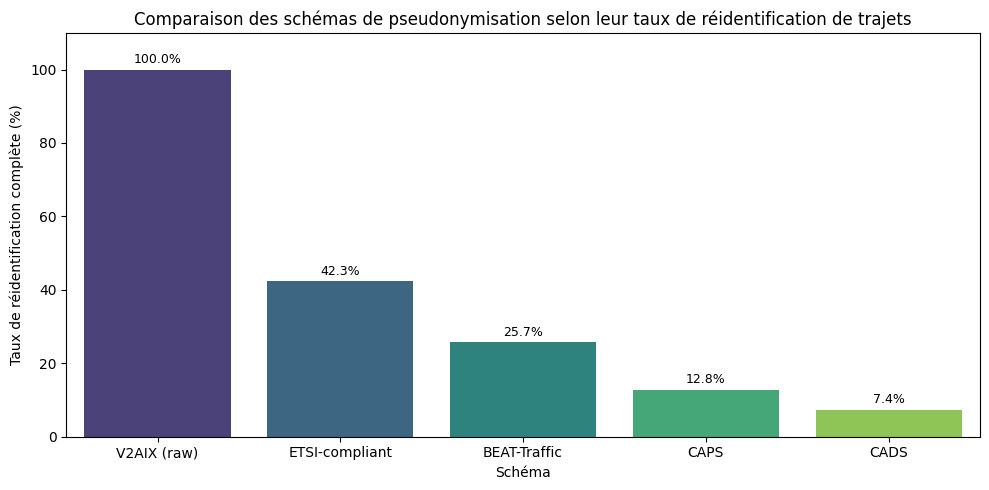

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier par score décroissant
df_relinking = df_relinking.sort_values("Taux de relinking (%)", ascending=False)

# Affichage
plt.figure(figsize=(10, 5))
sns.barplot(data=df_relinking, x="Schéma", y="Taux de relinking (%)", palette="viridis")

# Ajouter les labels
for index, row in df_relinking.iterrows():
    plt.text(index, row["Taux de relinking (%)"] + 1, f"{row['Taux de relinking (%)']:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.title("Comparaison des schémas de pseudonymisation selon leur taux de réidentification de trajets")
plt.ylabel("Taux de réidentification complète (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0)
plt.tight_layout()
plt.show()

---
---
---
↑ Phase de relinking ↑
---
---
---
---

In [72]:
# Conversion des timestamps
df_trajet_simule["start_time_local"] = pd.to_datetime(df_trajet_simule["start_time"], errors='coerce')
df_trajet_simule["end_time_local"] = pd.to_datetime(df_trajet_simule["end_time"], errors='coerce')

# Durée en minutes
df_trajet_simule["trip_duration_minutes"] = df_trajet_simule["trip_duration_seconds"] / 60

# Variables approximatives
variables_grossier = {
    "Identifiant trajet": df_trajet_simule["pseudonym_id"],
    "Heure de départ": df_trajet_simule["start_time_local"].dt.strftime("%H:%M"),
    "Heure d’arrivée": df_trajet_simule["end_time_local"].dt.strftime("%H:%M"),
    "Position de départ": df_trajet_simule[["start_latitude", "start_longitude"]].round(2).astype(str).agg(",".join, axis=1),
    "Position d’arrivée": df_trajet_simule[["end_latitude", "end_longitude"]].round(2).astype(str).agg(",".join, axis=1),
    "Durée du trajet": (df_trajet_simule["trip_duration_minutes"] / 5).round() * 5,
    "Distance parcourue": (df_trajet_simule["distance_km"] / 5).round() * 5,
    "Modèle de véhicule": df_trajet_simule["model_id"]
}

# Variables fines
variables_fines = {
    "Identifiant trajet": df_trajet_simule["pseudonym_id"],
    "Heure de départ": df_trajet_simule["start_time_local"].dt.strftime("%Y-%m-%d %H:%M"),
    "Heure d’arrivée": df_trajet_simule["end_time_local"].dt.strftime("%Y-%m-%d %H:%M"),
    "Position de départ": df_trajet_simule[["start_latitude", "start_longitude"]].round(3).astype(str).agg(",".join, axis=1),
    "Position d’arrivée": df_trajet_simule[["end_latitude", "end_longitude"]].round(3).astype(str).agg(",".join, axis=1),
    "Durée du trajet": df_trajet_simule["trip_duration_minutes"].round(),
    "Distance parcourue": df_trajet_simule["distance_km"].round(2),
    "Modèle de véhicule": df_trajet_simule["model_id"]
}

In [73]:
import numpy as np
import pandas as pd

def compute_unicity(series_dict, n_iter=30, frac=0.8):
    np.random.seed(42)
    results = {k: [] for k in series_dict}
    for _ in range(n_iter):
        sample = df_trajet_simule.sample(frac=frac)
        for label, series in series_dict.items():
            vals = series.loc[sample.index]
            ratio = vals.value_counts().eq(1).sum() / len(sample)
            results[label].append(ratio * 100)
    return pd.DataFrame({
        "Variable": list(results.keys()),
        "Moyenne": [np.mean(v) for v in results.values()],
        "Écart-type": [np.std(v) for v in results.values()]
    })

In [74]:
df_grossier = compute_unicity(variables_grossier)
df_grossier["Précision"] = "Approximative"

df_fine = compute_unicity(variables_fines)
df_fine["Précision"] = "Fine"

df_all = pd.concat([df_grossier, df_fine], ignore_index=True)

# Tri
df_all["Variable"] = pd.Categorical(
    df_all["Variable"],
    categories=df_all[df_all["Précision"] == "Fine"].sort_values("Moyenne")["Variable"],
    ordered=True
)
df_all = df_all.sort_values(["Variable", "Précision"])

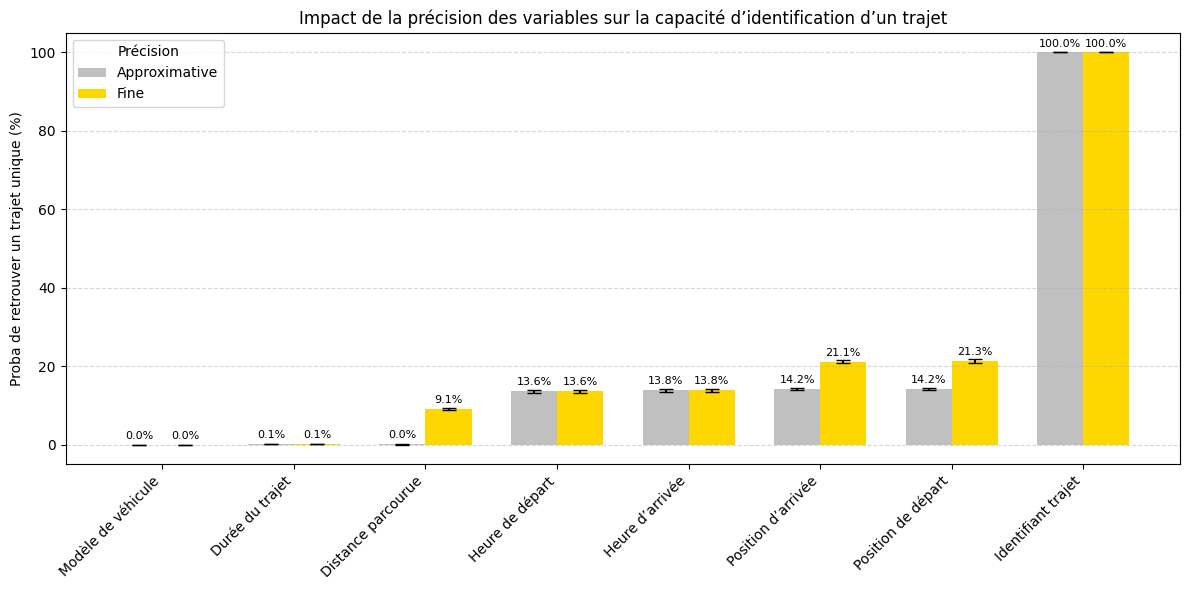

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = {"Approximative": "#C0C0C0", "Fine": "#FFD700"}
labels = df_all["Variable"].cat.categories
x = np.arange(len(labels))
width = 0.35

fine_means = df_all[df_all["Précision"] == "Fine"]["Moyenne"].values
fine_stds = df_all[df_all["Précision"] == "Fine"]["Écart-type"].values
gross_means = df_all[df_all["Précision"] == "Approximative"]["Moyenne"].values
gross_stds = df_all[df_all["Précision"] == "Approximative"]["Écart-type"].values

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, gross_means, width, yerr=gross_stds, capsize=5,
               label='Approximative', color=colors["Approximative"])
bars2 = ax.bar(x + width/2, fine_means, width, yerr=fine_stds, capsize=5,
               label='Fine', color=colors["Fine"])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1 if height > 0 else 0.5,
                f"{height:.1f}%", ha='center', va='bottom', fontsize=8)

ax.set_ylabel("Proba de retrouver un trajet unique (%)")
ax.set_title("Impact de la précision des variables sur la capacité d’identification d’un trajet")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend(title="Précision")
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [76]:
combinable_vars = {
    "Modèle": df_trajet_simule["model_id"],
    "Heure départ": df_trajet_simule["start_time"].dt.strftime("%Y-%m-%d %H:%M"),
    "Heure arrivée": df_trajet_simule["end_time"].dt.strftime("%Y-%m-%d %H:%M"),
    "Position départ": df_trajet_simule[["start_latitude", "start_longitude"]].round(3).astype(str).agg(",".join, axis=1),
    "Position arrivée": df_trajet_simule[["end_latitude", "end_longitude"]].round(3).astype(str).agg(",".join, axis=1),
    "Durée": df_trajet_simule["trip_duration_minutes"].round(),
    "Distance": df_trajet_simule["distance_km"].round(2)
}

In [77]:
import itertools

def compute_combo_unicity_split(vars_dict, df_source, n_iter=30, frac=0.8):
    results_2 = []
    results_3 = []
    keys = list(vars_dict.keys())

    for r in [2, 3]:
        for combo in itertools.combinations(keys, r):
            ratios = []
            for _ in range(n_iter):
                sample = df_source.sample(frac=frac)
                combo_series = vars_dict[combo[0]].loc[sample.index].astype(str)
                for key in combo[1:]:
                    combo_series += "_" + vars_dict[key].loc[sample.index].astype(str)
                unique_count = combo_series.value_counts().eq(1).sum()
                ratio = unique_count / len(sample)
                ratios.append(ratio * 100)
            result = {
                "Combinaison": " + ".join(combo),
                "Moyenne": np.mean(ratios),
                "Écart-type": np.std(ratios)
            }
            if r == 2:
                results_2.append(result)
            else:
                results_3.append(result)
    
    return pd.DataFrame(results_2), pd.DataFrame(results_3)


In [78]:
df_combo_2, df_combo_3 = compute_combo_unicity_split(combinable_vars, df_source=df_trajet_simule)

In [79]:
# Trier pour affichage
df_combo2 = df_combo_2.sort_values(by="Moyenne", ascending=False)
df_combo3 = df_combo_3.sort_values(by="Moyenne", ascending=False)

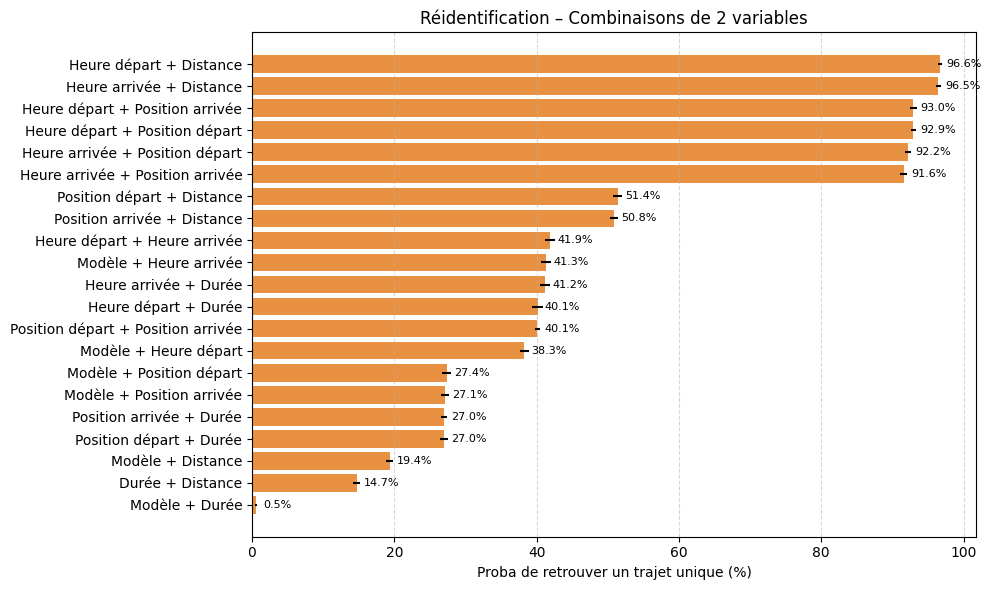

In [80]:
plt.figure(figsize=(10, 6))
plt.barh(df_combo2["Combinaison"], df_combo2["Moyenne"], xerr=df_combo2["Écart-type"], color="#e67e22", alpha=0.85)
plt.xlabel("Proba de retrouver un trajet unique (%)")
plt.title("Réidentification – Combinaisons de 2 variables")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle="--", alpha=0.5)

for i, v in enumerate(df_combo2["Moyenne"]):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=8)

plt.tight_layout()
plt.show()

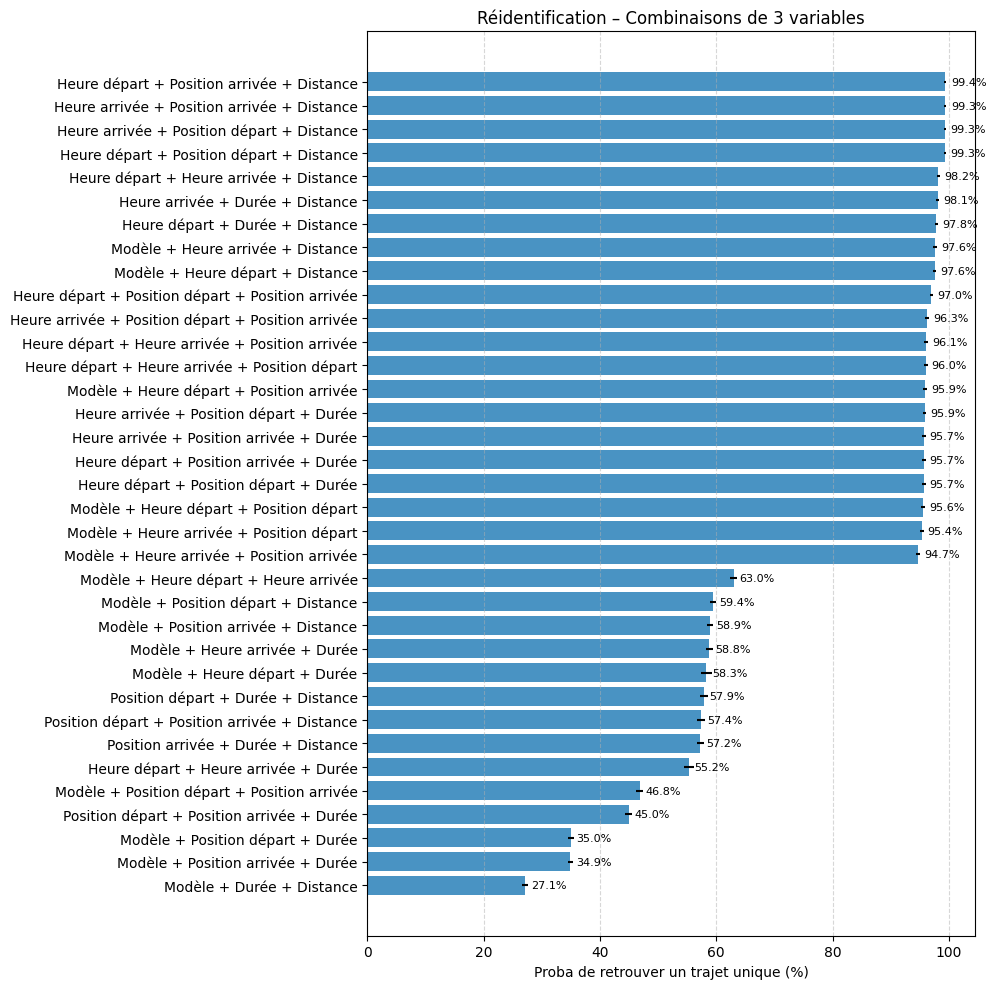

In [81]:
plt.figure(figsize=(10, 10))
plt.barh(df_combo3["Combinaison"], df_combo3["Moyenne"], xerr=df_combo3["Écart-type"], color="#2980b9", alpha=0.85)
plt.xlabel("Proba de retrouver un trajet unique (%)")
plt.title("Réidentification – Combinaisons de 3 variables")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle="--", alpha=0.5)

for i, v in enumerate(df_combo3["Moyenne"]):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [82]:
# Nombre de station_id distincts par pseudonym_id
station_per_pseudonym = df_trajet_simule.groupby("station_id")["pseudonym_id"].nunique()

# Compter ceux qui sont associés à un seul véhicule
unique_station_count = (station_per_pseudonym == 1).sum()

# Proportion de pseudonymes associés à un seul véhicule
pourcentage_identifiants_vehicule = 100 * unique_station_count / len(station_per_pseudonym)
print("Proportion de pseudonym_id associés à un seul véhicule :", np.round(pourcentage_identifiants_vehicule, 2), "%")

Proportion de pseudonym_id associés à un seul véhicule : 83.64 %


In [83]:
# Ne garder que les trajets de 800 mètres ou plus
df_filtre = df_trajet_simule[df_trajet_simule["distance_m"] >= 1500]

# Compter le nombre de pseudonymes distincts par véhicule (station_id)
pseudonym_per_station = df_filtre.groupby("station_id")["pseudonym_id"].nunique()

# Combien de véhicules (station_id) ont eu un seul pseudonyme
count_single_pseudonym = (pseudonym_per_station == 1).sum()

# Proportion
pourcentage = 100 * count_single_pseudonym / len(pseudonym_per_station)
print("Proportion de véhicules avec un seul pseudonym_id (trajets ≥ 1500m) :", np.round(pourcentage, 2), "%")

Proportion de véhicules avec un seul pseudonym_id (trajets ≥ 1500m) : 85.21 %


Regler le problème des model_id en NaN

In [84]:
df_trajet["trip_duration_minutes"](accending = True)

TypeError: 'Series' object is not callable